<a href="https://colab.research.google.com/github/lizardnote/Text-Analytics/blob/main/Text_data(2)_Tokenization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.Tokenization

## 1) Word2Vec
- 일정한 차원의 벡터로 단어를 표현
- 주변에 같은 단어가 나타날수록 비슷한 벡터가 되도록 학습
- 의미론적 유사도 비교 가능

In [ ]:
!pip install konlpy

In [ ]:
import urllib.request
import pandas as pd
from tqdm import tqdm

In [ ]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
train_data = pd.read_table('ratings.txt')
train_data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [ ]:
print('총 개수 : ',len(train_data))
print('결측개수 :', sum(train_data['document'].isnull()))

총 개수 :  200000
결측개수 : 8


DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [ ]:
train_data = train_data.dropna(how = "any") #null 값 존재하는 행 drop
print(train_data.isnull().values.any())

False


In [ ]:
#정규 표현식을 이용한 한글 외 문자 제거
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎ ㅏ-ㅣ 가-힣]", "")
train_data[:10]

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1
5,2190435,사랑을 해본사람이라면 처음부터 끝까지 웃을수 있는영화,1
6,9279041,완전 감동입니다 다시봐도 감동,1
7,7865729,개들의 전쟁2 나오나요? 나오면 1빠로 보고 싶음,1
8,7477618,굿,1
9,9250537,바보가 아니라 병 쉰 인듯,1


In [ ]:
# 불용어 정의
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

# 형태소 분석기 Okt 사용한 토큰화 작업
from konlpy.tag import Okt
okt = Okt()
tokenized_data = []

for sentence in tqdm(train_data['document'][:10000]):
  tokenized_sentence = okt.morphs(sentence, stem = True) # 토큰화
  stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
  tokenized_data.append(stopwords_removed_sentence)


100%|██████████| 10000/10000 [00:50<00:00, 196.37it/s]


리뷰의 최대 길이 : 87
리뷰의 평균 길이 : 11.9353


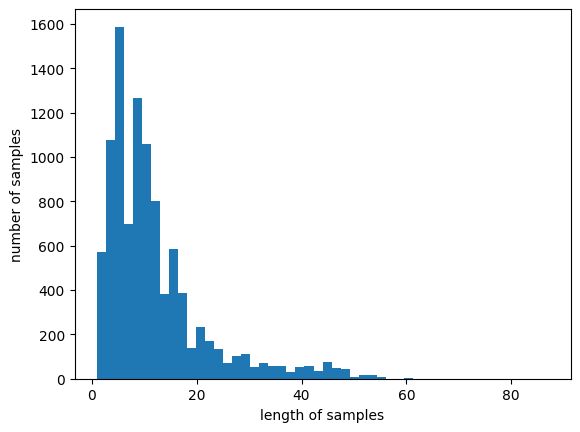

In [ ]:
# 리뷰 길이 분포 확인
import matplotlib.pyplot as plt

print('리뷰의 최대 길이 :',max(len(l) for l in tokenized_data))
print('리뷰의 평균 길이 :',sum(map(len, tokenized_data))/len(tokenized_data))
plt.hist([len(s) for s in tokenized_data], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
!pip install gensim

In [ ]:
!pip install --upgrade gensim

In [ ]:
import numpy as np
from gensim.models import Word2Vec

model = Word2Vec(sentences = tokenized_data, vector_size = 100, window = 5, min_count = 5, workers = 4, sg = 0)

In [ ]:
#완성된 매트릭스 크기 확인
model.wv.vectors.shape

(2593, 100)

In [ ]:
print(model.wv.most_similar("최민식"))

[('화려하다', 0.9908236861228943), ('일품', 0.9907870292663574), ('또한', 0.9907431602478027), ('이네', 0.9905475378036499), ('~!', 0.9904496669769287), ('터', 0.9904316663742065), ('모두', 0.9903994798660278), ('국민', 0.9903820753097534), ('제', 0.9903200268745422), ('장', 0.9902885556221008)]


In [ ]:
print(model.wv.most_similar("명작"))

[('시리즈', 0.9986293911933899), ('제일', 0.9984914660453796), ('대박', 0.9984493851661682), ('제', 0.9981717467308044), ('한국', 0.9981411099433899), ('임', 0.9981405138969421), ('좋아하다', 0.9981372356414795), ('애니', 0.9980931282043457), ('대단하다', 0.9980525970458984), ('역시', 0.9980319738388062)]


## 2) BPE Tokenizer
- 가장 작은 단위부터 중복 빈도 순으로 단위를 합침
- 가장 큰 단어까지 합치고 등장하지 않은 단어는 token으로 분절

In [ ]:
num_merges = 10

In [ ]:
dictionary = {'l o w </w>' : 5,
              'l o w e r </w>' : 2,
              'n e w e s t </w>': 6,
              'w i d e s t </w>': 3
             }

In [ ]:
import re, collections

def get_stats(dictionary):

    # 유니그램의 pair들의 빈도수를 카운트
    pairs = collections.defaultdict(int)

    for word, freq in dictionary.items():
        symbols = word.split()

        for i in range(len(symbols)-1):
            pairs[symbols[i],symbols[i+1]] += freq

    print('현재 pair들의 빈도수 :', dict(pairs))
    return pairs

In [ ]:
def merge_dictionary(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')

    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

In [ ]:
from IPython.display import display, Markdown, Latex

In [ ]:
bpe_codes = {}
bpe_codes_reverse = {}

for i in range(num_merges):
    display(Markdown("### Iteration {}".format(i + 1)))
    pairs = get_stats(dictionary)
    best = max(pairs, key=pairs.get)
    dictionary = merge_dictionary(best, dictionary)

    bpe_codes[best] = i
    bpe_codes_reverse[best[0] + best[1]] = best

    print("new merge: {}".format(best))
    print("dictionary: {}".format(dictionary))

### Iteration 1

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 8, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('e', 's'): 9, ('s', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'e'): 3}
new merge: ('e', 's')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w es t </w>': 6, 'w i d es t </w>': 3}


### Iteration 2

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'es'): 6, ('es', 't'): 9, ('t', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'es'): 3}
new merge: ('es', 't')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est </w>': 6, 'w i d est </w>': 3}


### Iteration 3

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est'): 6, ('est', '</w>'): 9, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est'): 3}
new merge: ('est', '</w>')
dictionary: {'l o w </w>': 5, 'l o w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


### Iteration 4

현재 pair들의 빈도수 : {('l', 'o'): 7, ('o', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('l', 'o')
dictionary: {'lo w </w>': 5, 'lo w e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


### Iteration 5

현재 pair들의 빈도수 : {('lo', 'w'): 7, ('w', '</w>'): 5, ('w', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('lo', 'w')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'n e w est</w>': 6, 'w i d est</w>': 3}


### Iteration 6

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('n', 'e'): 6, ('e', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('n', 'e')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'ne w est</w>': 6, 'w i d est</w>': 3}


### Iteration 7

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('ne', 'w'): 6, ('w', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('ne', 'w')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'new est</w>': 6, 'w i d est</w>': 3}


### Iteration 8

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('new', 'est</w>'): 6, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('new', 'est</w>')
dictionary: {'low </w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'w i d est</w>': 3}


### Iteration 9

현재 pair들의 빈도수 : {('low', '</w>'): 5, ('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('low', '</w>')
dictionary: {'low</w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'w i d est</w>': 3}


### Iteration 10

현재 pair들의 빈도수 : {('low', 'e'): 2, ('e', 'r'): 2, ('r', '</w>'): 2, ('w', 'i'): 3, ('i', 'd'): 3, ('d', 'est</w>'): 3}
new merge: ('w', 'i')
dictionary: {'low</w>': 5, 'low e r </w>': 2, 'newest</w>': 6, 'wi d est</w>': 3}


In [ ]:
print(bpe_codes)

{('e', 's'): 0, ('es', 't'): 1, ('est', '</w>'): 2, ('l', 'o'): 3, ('lo', 'w'): 4, ('n', 'e'): 5, ('ne', 'w'): 6, ('new', 'est</w>'): 7, ('low', '</w>'): 8, ('w', 'i'): 9}


In [ ]:
def get_pairs(word):
    """Return set of symbol pairs in a word.
    Word is represented as a tuple of symbols (symbols being variable-length strings).
    """
    pairs = set()
    prev_char = word[0]
    for char in word[1:]:
        pairs.add((prev_char, char))
        prev_char = char
    return pairs


def encode(orig):
    """Encode word based on list of BPE merge operations, which are applied consecutively"""

    word = tuple(orig) + ('</w>',)
    display(Markdown("__word split into characters:__ <tt>{}</tt>".format(word)))

    pairs = get_pairs(word)

    if not pairs:
        return orig

    iteration = 0
    while True:
        iteration += 1
        display(Markdown("__Iteration {}:__".format(iteration)))

        print("bigrams in the word: {}".format(pairs))
        bigram = min(pairs, key = lambda pair: bpe_codes.get(pair, float('inf')))
        print("candidate for merging: {}".format(bigram))
        if bigram not in bpe_codes:
            display(Markdown("__Candidate not in BPE merges, algorithm stops.__"))
            break
        first, second = bigram
        new_word = []
        i = 0
        while i < len(word):
            try:
                j = word.index(first, i)
                new_word.extend(word[i:j])
                i = j
            except:
                new_word.extend(word[i:])
                break

            if word[i] == first and i < len(word)-1 and word[i+1] == second:
                new_word.append(first+second)
                i += 2
            else:
                new_word.append(word[i])
                i += 1
        new_word = tuple(new_word)
        word = new_word
        print("word after merging: {}".format(word))
        if len(word) == 1:
            break
        else:
            pairs = get_pairs(word)

    # 특별 토큰인 </w>는 출력하지 않는다.
    if word[-1] == '</w>':
        word = word[:-1]
    elif word[-1].endswith('</w>'):
        word = word[:-1] + (word[-1].replace('</w>',''),)

    return word

In [ ]:
encode("loki")

__word split into characters:__ <tt>('l', 'o', 'k', 'i', '</w>')</tt>

__Iteration 1:__

bigrams in the word: {('i', '</w>'), ('l', 'o'), ('k', 'i'), ('o', 'k')}
candidate for merging: ('l', 'o')
word after merging: ('lo', 'k', 'i', '</w>')


__Iteration 2:__

bigrams in the word: {('i', '</w>'), ('lo', 'k'), ('k', 'i')}
candidate for merging: ('i', '</w>')


__Candidate not in BPE merges, algorithm stops.__

('lo', 'k', 'i')

In [ ]:
encode("lowest")

__word split into characters:__ <tt>('l', 'o', 'w', 'e', 's', 't', '</w>')</tt>

__Iteration 1:__

bigrams in the word: {('o', 'w'), ('s', 't'), ('e', 's'), ('t', '</w>'), ('w', 'e'), ('l', 'o')}
candidate for merging: ('e', 's')
word after merging: ('l', 'o', 'w', 'es', 't', '</w>')


__Iteration 2:__

bigrams in the word: {('o', 'w'), ('t', '</w>'), ('w', 'es'), ('l', 'o'), ('es', 't')}
candidate for merging: ('es', 't')
word after merging: ('l', 'o', 'w', 'est', '</w>')


__Iteration 3:__

bigrams in the word: {('w', 'est'), ('o', 'w'), ('l', 'o'), ('est', '</w>')}
candidate for merging: ('est', '</w>')
word after merging: ('l', 'o', 'w', 'est</w>')


__Iteration 4:__

bigrams in the word: {('o', 'w'), ('l', 'o'), ('w', 'est</w>')}
candidate for merging: ('l', 'o')
word after merging: ('lo', 'w', 'est</w>')


__Iteration 5:__

bigrams in the word: {('lo', 'w'), ('w', 'est</w>')}
candidate for merging: ('lo', 'w')
word after merging: ('low', 'est</w>')


__Iteration 6:__

bigrams in the word: {('low', 'est</w>')}
candidate for merging: ('low', 'est</w>')


__Candidate not in BPE merges, algorithm stops.__

('low', 'est')

In [ ]:
encode("lowing")

__word split into characters:__ <tt>('l', 'o', 'w', 'i', 'n', 'g', '</w>')</tt>

__Iteration 1:__

bigrams in the word: {('o', 'w'), ('n', 'g'), ('l', 'o'), ('i', 'n'), ('g', '</w>'), ('w', 'i')}
candidate for merging: ('l', 'o')
word after merging: ('lo', 'w', 'i', 'n', 'g', '</w>')


__Iteration 2:__

bigrams in the word: {('n', 'g'), ('lo', 'w'), ('i', 'n'), ('g', '</w>'), ('w', 'i')}
candidate for merging: ('lo', 'w')
word after merging: ('low', 'i', 'n', 'g', '</w>')


__Iteration 3:__

bigrams in the word: {('g', '</w>'), ('low', 'i'), ('i', 'n'), ('n', 'g')}
candidate for merging: ('g', '</w>')


__Candidate not in BPE merges, algorithm stops.__

('low', 'i', 'n', 'g')

In [ ]:
encode("highing")

__word split into characters:__ <tt>('h', 'i', 'g', 'h', 'i', 'n', 'g', '</w>')</tt>

__Iteration 1:__

bigrams in the word: {('h', 'i'), ('n', 'g'), ('i', 'g'), ('g', 'h'), ('i', 'n'), ('g', '</w>')}
candidate for merging: ('h', 'i')


__Candidate not in BPE merges, algorithm stops.__

('h', 'i', 'g', 'h', 'i', 'n', 'g')

## 3) HuggingFace Tokenizer

In [3]:
import pandas as pd
import urllib.request
from transformers import AutoTokenizer, AutoModel, pipeline
from tokenizers import BertWordPieceTokenizer

In [4]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt", filename="ratings.txt")
train_data = pd.read_table('ratings.txt')

In [6]:
naver_df  = pd.read_table('ratings.txt')
naver_df = naver_df.dropna(how = 'any')

In [8]:
with open('naver_review.txt', 'w', encoding = 'utf8') as f:
  f.write('\n'.join(naver_df['document']))

In [9]:
naver_df.head(5)

,id,document,label
0,8112052,어릴때보고 지금다시봐도 재밌어요ㅋㅋ,1
1,8132799,"디자인을 배우는 학생으로, 외국디자이너와 그들이 일군 전통을 통해 발전해가는 문화산...",1
2,4655635,폴리스스토리 시리즈는 1부터 뉴까지 버릴께 하나도 없음.. 최고.,1
3,9251303,와.. 연기가 진짜 개쩔구나.. 지루할거라고 생각했는데 몰입해서 봤다.. 그래 이런...,1
4,10067386,안개 자욱한 밤하늘에 떠 있는 초승달 같은 영화.,1


In [10]:
tokenizer = BertWordPieceTokenizer(lowercase=False)

In [11]:
data_file = 'naver_review.txt'
vocab_size = 30000
limit_alphabet = 6000
min_frequency = 5

tokenizer.train(files = data_file, vocab_size = vocab_size, limit_alphabet = limit_alphabet, min_frequency = min_frequency)

In [12]:
#BPE 알고리즘으로 얻게 되는 vocab 저장
tokenizer.save_model('./')

['./vocab.txt']

In [25]:
df = pd.read_fwf('vocab.txt', header = None)
df

,0
0,[PAD]
1,[UNK]
2,[CLS]
3,[SEP]
4,[MASK]
...,...
29995,맘을
29996,맛도
29997,망하지
29998,망한다


In [16]:
encoded = tokenizer.encode('아 배고픈데 짜장면 먹고싶다.')
print('토큰화 결과: ', encoded.tokens)
print('정수 인코딩: ', encoded.ids)
print('디코딩: ', tokenizer.decode(encoded.ids))

토큰화 결과:  ['아', '배고', '##픈', '##데', '짜장면', '먹고', '##싶다', '.']
정수 인코딩:  [2111, 20631, 3613, 3389, 24679, 8688, 7379, 18]
디코딩:  아 배고픈데 짜장면 먹고싶다.


샵의 의미는 앞에 연결된 접사/어미 등을 나타낼때 쓴다


In [18]:
encoded = tokenizer.encode('커피 한잔의 여유를 즐기다.')
print('토큰화 결과: ', encoded.tokens)
print('정수 인코딩: ', encoded.ids)
print('디코딩: ', tokenizer.decode(encoded.ids))

토큰화 결과:  ['커피', '한잔', '##의', '여유', '##를', '즐기', '##다', '.']
정수 인코딩:  [12825, 25645, 3373, 12696, 3347, 10784, 3239, 18]
디코딩:  커피 한잔의 여유를 즐기다.


In [30]:
from sklearn.pipeline import make_pipeline

#실제 embedding vector 확인해보기
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

tokenizer.add_special_tokens({'pad_token':'[PAD]'})
tokenizer.add_special_tokens({'unk_token':'[UNK]'})

model.resize_token_embeddings(len(tokenizer))

pipe = pipeline('feature-extraction', model=model, tokenizer=tokenizer)

Device set to use cpu


In [31]:
data = pipe('This is a test')
print(len(data[0]))
print(len(data[0][0]))
print(data[0])

6
768
[[-0.026014449074864388, 0.19197262823581696, 0.03443865478038788, -0.07194504886865616, -0.11282810568809509, -0.2831309139728546, 0.09150350093841553, 0.12827178835868835, -0.004860712680965662, -0.14723284542560577, -0.02782871015369892, -0.06148500367999077, -0.05599752068519592, 0.18917089700698853, 0.1371898353099823, -0.14089320600032806, 0.022946596145629883, 0.19262821972370148, 0.09546227008104324, -0.20831413567066193, -0.10455271601676941, -0.09069589525461197, -0.18040074408054352, -0.2847973704338074, -0.013938501477241516, -0.12907247245311737, 0.037471625953912735, -0.15027274191379547, 0.05749122053384781, 0.13891828060150146, 0.16705584526062012, 0.009245113469660282, -0.0757925733923912, 0.17022353410720825, -0.03154502809047699, -0.05634450167417526, 0.08796167373657227, -0.03658274933695793, 0.07899647951126099, 0.0026788990944623947, -0.04536345601081848, 0.022180281579494476, 0.12595276534557343, 0.05710231885313988, -0.16020040214061737, -0.097464092075824